In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pickle
import networkx as nx
import ipywidgets
from ipywidgets import widgets

from run_simulation import invasion_main

In [2]:
simulation_df = invasion_main(15) # Change this to change the number of weeks
# print(type(simulation_df))
simulation_df

,County,Week 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,Week 10,Week 11,Week 12,Week 13,Week 14,Week 15
0,Cook,0.1,0.117668,0.169101,0.238528,0.350879,0.554651,0.860963,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1
1,DuPage,0.0,0.053862,0.125120,0.186773,0.308831,0.545374,0.892683,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1
2,Kane,0.3,0.322413,0.372320,0.461629,0.583759,0.880159,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1
3,Will,0.0,0.040711,0.116423,0.215916,0.357832,0.571555,0.896806,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1
4,Winnebago,0.0,0.105840,0.264694,0.569023,0.805152,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Henderson,0.0,0.000004,0.000078,0.000827,0.003220,0.013172,0.028351,0.055582,0.160002,0.414948,0.786967,1.000000,1.000000,1.000000,1.0,1
98,Calhoun,0.0,0.017914,0.062894,0.133033,0.273115,0.501241,0.881093,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1
99,Schuyler,0.0,0.000008,0.000332,0.001754,0.006890,0.020926,0.050195,0.120669,0.246934,0.568517,0.976932,1.000000,1.000000,1.000000,1.0,1
100,Gallatin,0.0,0.000004,0.000043,0.000350,0.001150,0.002726,0.012186,0.028456,0.068879,0.133382,0.303241,0.607072,1.000000,1.000000,1.0,1


In [3]:
visual_df = simulation_df.T
visual_df.columns = visual_df.iloc[0]
visual_df = visual_df.drop(visual_df.index[0])
visual_df

County,Cook,DuPage,Kane,Will,Winnebago,Lake,McHenry,St. Clair,Kendall,Madison,...,Scott,Stark,Jasper,Hamilton,Pike,Henderson,Calhoun,Schuyler,Gallatin,Pope
Week 0,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Week 1,0.117668,0.053862,0.322413,0.040711,0.10584,0.035896,0.072501,0.041725,0.060476,0.516046,...,0.002828,0.000997,0.000095,0.000033,0.001185,0.000004,0.017914,0.000008,0.000004,0.0
Week 2,0.169101,0.12512,0.37232,0.116423,0.264694,0.110356,0.127777,0.114003,0.111905,0.556316,...,0.018531,0.005088,0.001259,0.00035,0.005468,0.000078,0.062894,0.000332,0.000043,0.000001
Week 3,0.238528,0.186773,0.461629,0.215916,0.569023,0.205029,0.247258,0.171164,0.197815,0.654639,...,0.036261,0.020653,0.008321,0.001444,0.029938,0.000827,0.133033,0.001754,0.00035,0.000016
Week 4,0.350879,0.308831,0.583759,0.357832,0.805152,0.356012,0.497508,0.27255,0.36719,0.794165,...,0.094442,0.050943,0.02843,0.003899,0.07192,0.00322,0.273115,0.00689,0.00115,0.000078
Week 5,0.554651,0.545374,0.880159,0.571555,1.0,0.611934,0.829489,0.441855,0.662139,1.0,...,0.183088,0.116023,0.07415,0.013535,0.152638,0.013172,0.501241,0.020926,0.002726,0.000581
Week 6,0.860963,0.892683,1.0,0.896806,1.0,1.0,1.0,0.683421,1.0,1.0,...,0.324614,0.239175,0.152281,0.035566,0.343801,0.028351,0.881093,0.050195,0.012186,0.001855
Week 7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.618058,0.451847,0.34235,0.068378,0.612875,0.055582,1.0,0.120669,0.028456,0.006054
Week 8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.809121,0.695291,0.154976,0.941123,0.160002,1.0,0.246934,0.068879,0.020162
Week 9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.337048,1.0,0.414948,1.0,0.568517,0.133382,0.049465


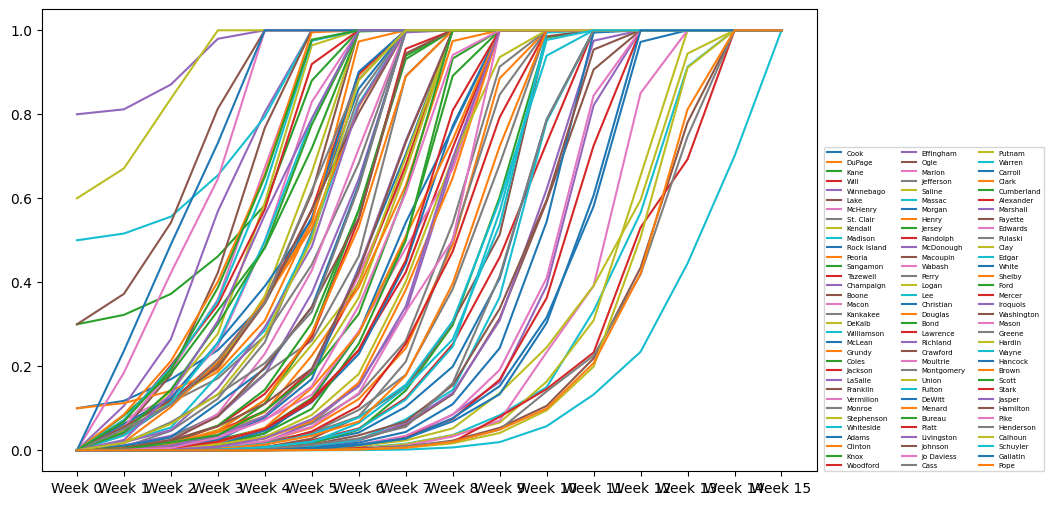

In [4]:
plt.figure(figsize=(10,6))
for county in visual_df.columns:
    plt.plot(visual_df.index, visual_df[county])
plt.legend(visual_df.columns, loc=(1.01, 0), fontsize=5, ncol=3)
plt.show()

In [5]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

In [6]:
def make_network_heat(week):
    week = f'Week {week}'
#     min_value = simulation_df[week].min()
#     max_value = simulation_df[week].max()  # This makes the scale variable for each chart
    max_value = 1  # This keeps the scale constant 
    min_value = 0
    cmap = matplotlib.colormaps['YlOrRd']

    node_colors = {}
    for node in CG.nodes():
        value = simulation_df.loc[simulation_df['County'] == node.name, week].iloc[0]
        normalized_value = (value - min_value) / (max_value - min_value)
        node_colors[node.name] = cmap(normalized_value)

    labels = {node: handler[node.name].name for node in CG.nodes()}
    fig, ax = plt.subplots(figsize=(10, 15))
    node_positions = {node: [node.centroid.x, node.centroid.y] for node in CG.nodes()}
    nx.draw(CG, 
            pos=node_positions,
            ax=ax, 
            node_color=[node_colors.get(node.name, 'gray') for node in CG.nodes()],
            node_size=1500, )

    nx.draw_networkx_labels(CG, 
                            pos=node_positions, 
                            labels=labels,
                            font_size=6, 
                            ax=ax,
                           font_color='k')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_value, vmax=max_value))
    sm.set_array([])
    sub_ax = plt.axes([0.96, 0.55, 0.02, 0.3])
    plt.colorbar(sm, cax=sub_ax)
    plt.show()

In [7]:
widgets.interact(make_network_heat,
    week=widgets.IntSlider(min=0, max=len(simulation_df.columns)-2, step=1, layout=widgets.Layout(width='1000px')),
)

interactive(children=(IntSlider(value=0, description='week', layout=Layout(width='1000px'), max=15), Output())…

<function __main__.make_network_heat(week)>

In [8]:
# This doesn't work very well for me since the page keeps re-centering

play = widgets.interact(make_network_heat, 
    week=widgets.Play( value=0,
                        min=0,
                        max=len(simulation_df.columns) - 2,
                        step=1,
                        interval=500,
                        disabled=False
                    ))

interactive(children=(Play(value=0, description='week', interval=500, max=15), Output()), _dom_classes=('widge…